### Importings

In [58]:
import pandas as pd
from arctic import Arctic
from arctic.date import DateRange
import matplotlib.pyplot as plt
import numpy as np
from arctic.hooks import register_get_auth_hook
from arctic.auth import Credential
from datetime import timedelta, datetime
import scipy.optimize as opt
import pyrenko
from scipy import stats, signal
import plotly.graph_objects as go
import backtesting_base_mostoro

### Getting Data

In [59]:
# def arctic_auth_hook(mongo_host, app, database):
#     return Credential(database='arctic',user='camilo',password='Mr.robot#77')

In [60]:
symbol = 'MES'
start  = '2022-10-16'
end    = '2022-10-28'
amount = 5000

In [61]:
# def get_data(start, end):
#     register_get_auth_hook(arctic_auth_hook)
#     store = Arctic('137.184.109.220')
#     library = store['Futures_Historical_Ticks']
    
#     return (library.read(symbol, date_range=DateRange('%s' % start, '%s' % end)).data)

In [62]:
# data = get_data(start, end)

In [63]:
#resampling to 5 seconds

# bar_time = '5S'

# Open = data.Last.resample(bar_time).first()
# High = data.Last.resample(bar_time).max()
# Low = data.Last.resample(bar_time).min()
# Close = data.Last.resample(bar_time).last()
# Volume = data.Volume.resample(bar_time).sum()

# data_five_secs = pd.concat([Open, High, Low, Close, Volume],axis=1).dropna()
# data_five_secs.columns = ['open', 'high', 'low', 'close', 'volume']



### Volume Profile

In [64]:
#creating profile in home
# profile = data.groupby(['Last']).sum().sort_values(by=['Last'])

In [65]:
# profile

In [66]:
# poc = profile.idxmax()[0]

In [67]:
# unique_dates = np.unique(data.index.date)

In [68]:
# unique_dates

In [69]:
# time_between    = 15
# session_minutes = 180+time_between
# poc_qty         = int(session_minutes/time_between)
# total_pocs      = []

# for i in range(1, len(unique_dates)):
#     init_date  = '%s 00:00:00'%unique_dates[i]
#     final_date = '%s 17:00:00'%unique_dates[i]
#     data_day   = data.loc[init_date:final_date]
    
#     if len(data_day) > 0:
#         poc_time = pd.to_datetime('%s 09:30:00'%unique_dates[i])

#         pocs = []
#         for p in range(poc_qty):
#             current_time = str(poc_time + timedelta(minutes=p*time_between))
#             profile      = data_day[:current_time].groupby(['Last']).sum().sort_values(by=['Last'], ascending=False)
#             poc          = profile.idxmax()[0]
#             pocs.append({'current_time':current_time, 'profile':profile, 'poc':poc})
        
#         total_pocs.append({'date':unique_dates[i], 'pocs':pocs})

In [70]:
# total_pocs

In [71]:
# kde_factor = 0.01
# num_samples = 500
# kde = stats.gaussian_kde(data.Last,weights=data.Volume,bw_method=kde_factor)
# xr = np.linspace(data.Last.min(),data.Last.max(),num_samples)
# kdy = kde(xr)
# ticks_per_sample = (xr.max() - xr.min()) / num_samples

In [72]:
#This is for plotting the peaks

# def get_dist_plot(c, v, kx, ky):
#     fig = go.Figure()
#     fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
#                                histfunc='sum', histnorm='probability density',
#                                marker_color='#B0C4DE'))
#     fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
#     return fig

# get_dist_plot(data.Last, data.Volume, xr, kdy).show()

In [73]:
# finding peaks

# peaks,_ = signal.find_peaks(kdy)
# pkx = xr[peaks]
# pky = kdy[peaks]

#pk_marker_args=dict(size=10)
#fig = get_dist_plot(data.Last, data.Volume, xr, kdy)
#fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

In [74]:
# min_prom = kdy.max() * 0.33
# peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)
# pkx = xr[peaks]
# pky = kdy[peaks]

# fig = get_dist_plot(data.Last, data.Volume, xr, kdy)
# fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

# # Draw prominence lines
# left_base = peak_props['left_bases']
# right_base = peak_props['right_bases']
# line_x = pkx
# line_y0 = pky
# line_y1 = pky - peak_props['prominences']

# for x, y0, y1 in zip(line_x, line_y0, line_y1):
#     fig.add_shape(type='line',
#         xref='x', yref='y',
#         x0=x, y0=y0, x1=x, y1=y1,
#         line=dict(
#             color='red',
#             width=2,
#         )
#     )
# fig.show()

In [75]:
# min_prom = kdy.max() * 0.5
# peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom)

# left_base = peak_props['left_bases']
# right_base = peak_props['right_bases']
# int_from = xr.min() + (left_base * ticks_per_sample)
# int_to = xr.min() + (right_base * ticks_per_sample)

# [kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

In [76]:
# def peaks_pr_vol():

#     pr_vol = pd.DataFrame(columns = ['price', 'volume'])

#     for x in range(len(peaks)):

#         frecuency = data[data['Last'] == round(xr[peaks[x]], 0)]['Volume'].sum()
#         pr_vol = pr_vol.append({'price': round(xr[peaks[x]],0), 'volume': frecuency}, ignore_index=True)

#     pr_vol = pr_vol.sort_values(by=['volume'], ascending=False)
    
#     return pr_vol

In [77]:
# def peaks_around():
#     'peaks with volume greater than a factor and with a considerable poc deviation'
#     poc_factor = 0.5
#     dev_range = range(-10,11)
    
#     pr_vol = peaks_pr_vol()
#     pot_pocs = pr_vol[pr_vol['volume']>=(pr_vol['volume'].iloc[0]*poc_factor)]
#     pot_pocs['poc_deviation'] = pot_pocs['price'] - pot_pocs['price'].iloc[0]
    
    
#     pot_pocs['in_range'] = pot_pocs['poc_deviation'].isin(dev_range)
#     pot_pocs = pot_pocs[pot_pocs['in_range']==False]
#     pot_pocs.drop(columns=['in_range'])



#     return pot_pocs

In [78]:
# peaks_pr_vol()

In [79]:
# peaks_around()

### Iteration on Renko Prices

In [80]:
tick_size = 0.25

def x_round(x):
    mult = 1/tick_size
    return round(x*mult)/mult


def evaluate_renko(brick, history, dates, column_name):
    renko_obj = pyrenko.renko()
    renko_obj.set_brick_size(brick_size = brick)
    renko_obj.build_history(prices=history, dates=dates)
    return renko_obj.evaluate()[column_name]

def get_brick_size(data):
    # Getting bounds by ATR
    atr_window = 14
    high_low = data['high'] - data['low']
    high_cp = np.abs(data['high'] - data['close'].shift())
    low_cp = np.abs(data['low'] - data['close'].shift())
    df = pd.concat([high_low, high_cp, low_cp], axis=1)
    true_range = np.max(df, axis=1)
    atr = true_range.rolling(atr_window).mean()

    

    # Brick size maximization
    opt_bs = opt.fminbound(lambda x: -evaluate_renko(brick = x, history = data.close, dates=data.index,
                                    column_name = 'score'), np.min(atr), np.max(atr), disp=0)
    
    return opt_bs

#### Bar to Bar

In [81]:
# results = pd.DataFrame(renko_obj.evaluate(), index=[brick])

In [82]:
# results

In [83]:
def current_date(bar):
    '''Retrieves current date, weekday & hour'''
    global date
    global weekday
    global hour
    date = data_five_secs.index[bar].date()
    weekday = date.weekday()
    hour = data_five_secs.index[bar].time()

In [84]:
backtesting_base = backtesting_base_mostoro.Backtesting(start, end, symbol, amount) #calling backtesting base
data = backtesting_base.data
data_five_secs = backtesting_base.data
num_days = 5
total_dates = np.unique(data.index.date)
back_dates = []
filling_back_dates = [back_dates.append([total_dates[x-num_days+1], total_dates[x], total_dates[x+1]]) for x in range(num_days-1,len(total_dates)-1,1)]

MES Data Loaded! in backtesting base


In [85]:
#final code but it is commented because im trying to improve some cells below

# Iterate over backtesting dates
last_len = 0
for dates in back_dates:
    temporalities = ['1Min', '2Min', '3Min', '4Min', '5Min', '6Min', '10Min', '12Min', '15Min', '20Min', '30Min']
    data_renko = data.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]]
    #for dates in back_dates:
    correct_brick = True
    # Calculating Brick size
    total_results = []
    for tempo in temporalities:
        Open = data_five_secs.open.resample(tempo).first()
        High = data_five_secs.high.resample(tempo).max()
        Low = data_five_secs.low.resample(tempo).min()
        Close = data_five_secs.close.resample(tempo).last()
        data_res = pd.concat([Open, High, Low, Close],axis=1).dropna()
        data_res.columns = ['open', 'high', 'low', 'close']

        data_training = data_res.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]]
        brick = x_round(get_brick_size(data_training))

        data_test = data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 00:00:00'%dates[1]]
        renko_obj = pyrenko.renko()
        renko_obj.set_brick_size(brick_size = brick)
        renko_obj.build_history(prices = data_test.close.values, dates=data_test.index)
        prices = renko_obj.get_renko_prices()
        results = pd.DataFrame(renko_obj.evaluate(), index=[brick])
        partial = {'tempo': tempo, 'brick':brick, 'balance':results.balance.iloc[0], 'sign_changes':results.sign_changes.iloc[0],
                   'price_ratio':round(results.price_ratio.iloc[0],2), 'score':round(results.score.iloc[0],2)}
        total_results.append(partial)
    final_results = pd.DataFrame(total_results).set_index('tempo')
    brick = final_results.sort_values('score', ascending=False).iloc[0].brick
    score = final_results[final_results.brick == brick].score[0]
    
    
    
    
    
#     # If score is less than 1, Operation is not allowed during this week
#     if score < 0: 
#         correct_brick = False
      
    
    
#     #pattern=np.array([4., 3., 2., 1., 0., -1., 0])
# #     pattern_sell = np.array([ 0., 1., 2., 3., 4., 5., 3.])
# #     pattern_buy = np.array([0., -1., -2., -3., -4., -5., -3.])
#     pattern_buy = np.array([ 3., 2., 1., 0., -1., -2., 0.])
#     pattern_sell = np.array([ -3., -2., -1., 0., 1., 2., 0.])



    
    
#     if correct_brick:
#         # Setting renko object and build history
#         pattern_len = len(pattern_sell)
#         renko_object = pyrenko.renko()                    # Defining renko object
#         renko_object.set_brick_size(brick_size=brick)     # Defining brick size
#         print('Building History...')
#         renko_object.build_history(prices=data_five_secs.close.values,dates=data_five_secs.index)
#         print('History Built!')

#         #init_idx = self.data.index.get_loc(self.data.loc[dates[0]:dates[2]].index[0])
#         final_idx = data_five_secs.index.get_loc(data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]].index[-1])
#         until_idx = data_five_secs.index.get_loc(data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[2]].index[-1])

#         for bar in range(final_idx+1, until_idx+1, 1):
#             current_date(bar)
#             print(bar)

#             # Update Renko Bars
#             renko_object.do_next(data_five_secs.close.values[bar], data_five_secs.index.values[bar])
#             prices = renko_object.get_renko_prices()
#             current_len = len(prices)
            
            
#             if current_len != last_len:
#                 num_new_bars = current_len - last_len
#                 new_bar = True; last_len = current_len
#                 movements = (prices - prices[0]) / brick



#             position = 0
#             if correct_brick and position == 0:
#                     if new_bar:
#                         recognition = movements[-pattern_len:] - movements[-1]


#             if not (weekday == 4 and hour > pd.to_datetime('12:00:00').time()) and sum(recognition== pattern_buy) == pattern_len:
#                 print('buy')
#             else:
#                 print('not sell')

#### All Data

In [86]:
renko_obj = pyrenko.renko()
renko_obj.set_brick_size(brick_size = brick)
renko_obj.build_history(prices = data_five_secs.close.values, dates=data_five_secs.index)
prices_all_data = renko_obj.get_renko_prices()

In [87]:
results = pd.DataFrame(renko_obj.evaluate(), index=[brick])

In [88]:
results

,balance,sign_changes,price_ratio,score
11.5,-5,44,1157.968992,-1.0


#### Comparing All Data With Bar to Bar Data

In [89]:
diferencia = [e1 - e2 for e1, e2 in zip(prices_all_data,prices)]
difer_not_cero = (i for i in diferencia if i != 0)
print(diferencia)
difer_not_cero

[-193.5, -191.75, -190.0, -159.0, -137.75, -116.5, -95.25, -74.0, -52.75, -60.75, -93.5, -80.25, -78.5, -76.75, -45.75, -53.75, -22.75, -65.25, -22.75, -1.5, -14.75, -45.75, -67.0, -88.25, -109.5, -96.25, -65.25, -73.25, -76.75, -107.75, -94.5, -92.75, -91.0, -89.25, -122.0, -114.0, -115.75, -83.0, -125.5, -146.75, -133.5, -166.25, -187.5, -208.75, -166.25, -179.5, -146.75, -160.0, -127.25, -135.25, -168.0]


<generator object <genexpr> at 0x7fb9ebdcf1d0>

#### Activating Oders and Generating Backtesting - WIP

In [90]:
# backtesting_base.place_order(direction='Long', price=1000, contracts=1, bar=3)

In [91]:
# backtesting_base.place_order(direction='Short', price=1010, contracts=1, bar=3)

In [92]:
backtesting_base.profit

,Instrument,Direction,Contracts,Commision,Price,Stop,Target,Time,Position,Profit


In [93]:
#this is a prior version of code some cells below (the code that worked)
# bar=3
# movements = (prices - prices[0]) / brick
# movements = np.append(movements, [pattern_buy])

# for i in range(200):
#     recognition = movements[-pattern_len:] - movements[-1]
#     print(recognition)
    
#     if backtesting_base.position == 0:
        
#         if not (weekday == 4 and hour > pd.to_datetime('12:00:00').time()) and sum(recognition == pattern_buy) == pattern_len:
#             print('long')
#             backtesting_base.place_order(direction='Long', price=data_five_secs.close.iloc[bar], contracts=1, bar=bar)
#             movements = np.append(movements, [2])
#             #movements = np.append(movements, [17.130434782608695])
#     #     else:
#     #         print('not sell')
#         # Check for Exit
# #         if backtesting_base.profit.Position.iloc[-1] != 0:
#             #closing position
    
#     else:
#         print(data_five_secs.close.iloc[bar])
#         if data_five_secs.close.iloc[bar] <= float(backtesting_base.profit.Stop.iloc[-1]):
#             #print(data_five_secs.close.iloc[bar])
#             #print('stop: ' + backtesting_base.profit.Stop )
#             print('x')
#         if data_five_secs.close.iloc[bar] >= float(backtesting_base.profit.Target.iloc[-1]):
#             print('y')
#             backtesting_base.place_order(direction='Short', price=float(backtesting_base.profit.Target.iloc[-1]), contracts=1, bar=bar)
            
#     bar += 1
    
    
#     #else:
#         #if data_five_secs.close.iloc[bar] <= float(backtesting_base.profit.Stop):
#             #backtesting_base.place_order(direction='Short', price=data_five_secs.close.iloc[bar], contracts=1, bar=bar
                                         
#         #if data_five_secs.close.iloc[bar] >= pd.to_numeric(backtesting_base.profit.Target, errors='coerce'):
#          #                                backtesting_base.place_order(direction='Short', price=data_five_secs.close.iloc[bar], contracts=1, bar=bar)  

    
#     #bar += 1

In [94]:
# Iterate over backtesting dates
last_len = 0
for dates in back_dates:
    data_renko = data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]]
    temporalities = ['1Min', '2Min', '3Min', '4Min', '5Min', '6Min', '10Min', '12Min', '15Min', '20Min', '30Min']
    data_renko = data.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]]
    #for dates in back_dates:
    correct_brick = True
    # Calculating Brick size
    total_results = []
    for tempo in temporalities:
        Open = data_five_secs.open.resample(tempo).first()
        High = data_five_secs.high.resample(tempo).max()
        Low = data_five_secs.low.resample(tempo).min()
        Close = data_five_secs.close.resample(tempo).last()
        data_res = pd.concat([Open, High, Low, Close],axis=1).dropna()
        data_res.columns = ['open', 'high', 'low', 'close']

        data_training = data_res.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]]
        brick = x_round(get_brick_size(data_training))

        data_test = data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 00:00:00'%dates[1]]
        renko_obj = pyrenko.renko()
        renko_obj.set_brick_size(brick_size = brick)
        renko_obj.build_history(prices = data_test.close.values, dates=data_test.index)
        prices = renko_obj.get_renko_prices()
        results = pd.DataFrame(renko_obj.evaluate(), index=[brick])
        partial = {'tempo': tempo, 'brick':brick, 'balance':results.balance.iloc[0], 'sign_changes':results.sign_changes.iloc[0],
                   'price_ratio':round(results.price_ratio.iloc[0],2), 'score':round(results.score.iloc[0],2)}
        total_results.append(partial)
    final_results = pd.DataFrame(total_results).set_index('tempo')
    brick = final_results.sort_values('score', ascending=False).iloc[0].brick
    score = final_results[final_results.brick == brick].score[0]
    
    
    
    
    
    # If score is less than 1, Operation is not allowed during this week
    if score < 0: 
        correct_brick = False
      
    
    
    #pattern=np.array([4., 3., 2., 1., 0., -1., 0])
#     pattern_sell = np.array([ 0., 1., 2., 3., 4., 5., 3.])
#     pattern_buy = np.array([0., -1., -2., -3., -4., -5., -3.])
    pattern_buy = np.array([ 3., 2., 1., 0., -1., -2., 0.])
    pattern_sell = np.array([ -3., -2., -1., 0., 1., 2., 0.])



    
    
    if correct_brick:
        # Setting renko object and build history
        pattern_len = len(pattern_sell)
        renko_object = pyrenko.renko()                    # Defining renko object
        renko_object.set_brick_size(brick_size=brick)     # Defining brick size
        print('Building History...')
        renko_object.build_history(prices=data_renko.close.values,dates=data_renko.index)
        print('History Built!')

    

        #init_idx = self.data.index.get_loc(self.data.loc[dates[0]:dates[2]].index[0])
        final_idx = data_five_secs.index.get_loc(data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 23:59:59'%dates[1]].index[-1])
        until_idx = data_five_secs.index.get_loc(data_five_secs.loc['%s 00:00:00'%dates[0]:'%s 08:00:00'%dates[2]].index[-1])

        for bar in range(final_idx+1, until_idx+1, 1):
            current_date(bar)
            print(bar)

            # Update Renko Bars
            renko_object.do_next(data_five_secs.close.values[bar], data_five_secs.index.values[bar])
            prices = renko_object.get_renko_prices()
            current_len = len(prices)
            
            
            if current_len != last_len:
                num_new_bars = current_len - last_len
                new_bar = True; last_len = current_len
                movements = (prices - prices[0]) / brick



            
            if correct_brick and backtesting_base.position == 0:
                    if new_bar:
                        recognition = movements[-pattern_len:] - movements[-1]

                    #long order
                    if not (weekday == 4 and hour > pd.to_datetime('12:00:00').time()) and sum(recognition == pattern_buy) == pattern_len:
                        print('long')
                        print(movements)
                        print(recognition)
                        print(prices)
                        backtesting_base.place_order(direction='Long', price=data_five_secs.close.iloc[bar], contracts=1, bar=bar)
                        
                        
                    #short order   
                    if not (weekday == 4 and hour > pd.to_datetime('12:00:00').time()) and sum(recognition == pattern_sell) == pattern_len:
                        print('short')
                        print(movements)
                        print(recognition)
                        print(prices)
                        backtesting_base.place_order(direction='Short', price=data_five_secs.close.iloc[bar], contracts=1, bar=bar)
            
            
            
                    
                    
            elif correct_brick and backtesting_base.position != 0:
            
                print(data_five_secs.close.iloc[bar])
            
                if backtesting_base.profit.Direction.iloc[-1] == 'Long': #exit long position

                    if data_five_secs.close.iloc[bar] <= float(backtesting_base.profit.Stop.iloc[-1]):
                        backtesting_base.place_order(direction='Short', price=float(backtesting_base.profit.Stop.iloc[-1]), contracts=1, bar=bar)
                        #print(data_five_secs.close.iloc[bar])
                        #print('stop: ' + backtesting_base.profit.Stop )
                        print('exit long position by stop')
                        print('position: {}'.format(backtesting_base.position))
                        print(prices)
                        movements = np.append(movements, [0])
                    elif data_five_secs.close.iloc[bar] >= float(backtesting_base.profit.Target.iloc[-1]):
                        backtesting_base.place_order(direction='Short', price=float(backtesting_base.profit.Target.iloc[-1]), contracts=1, bar=bar)
                        print('exit long position by target')
                        print('position: {}'.format(backtesting_base.position))
                        print(prices)
                        movements = np.append(movements, [0])
                
                elif backtesting_base.profit.Direction.iloc[-1] == 'Short': #exit short position

                        if data_five_secs.close.iloc[bar] >= float(backtesting_base.profit.Stop.iloc[-1]):
                            backtesting_base.place_order(direction='Long', price=float(backtesting_base.profit.Stop.iloc[-1]), contracts=1, bar=bar)
                            #print(data_five_secs.close.iloc[bar])
                            #print('stop: ' + backtesting_base.profit.Stop )
                            print('exit short position by stop')
                            print('position: {}'.format(backtesting_base.position))
                            print(prices)
                            movements = np.append(movements, [0])
                        elif data_five_secs.close.iloc[bar] <= float(backtesting_base.profit.Target.iloc[-1]):
                            backtesting_base.place_order(direction='Long', price=float(backtesting_base.profit.Target.iloc[-1]), contracts=1, bar=bar)
                            print('exit short position by target')
                            print('position: {}'.format(backtesting_base.position))
                            print(prices)
                            movements = np.append(movements, [0])
                        

Building History...
History Built!
68761
68762
68763
68764
68765
68766
68767
68768
68769
68770
68771
68772
68773
68774
68775
68776
68777
68778
68779
68780
68781
68782
68783
68784
68785
68786
68787
68788
68789
68790
68791
68792
68793
68794
68795
68796
68797
68798
68799
68800
68801
68802
68803
68804
68805
68806
68807
68808
68809
68810
68811
68812
68813
68814
68815
68816
68817
68818
68819
68820
68821
68822
68823
68824
68825
68826
68827
68828
68829
68830
68831
68832
68833
68834
68835
68836
68837
68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921

In [95]:
backtesting_base.profit

,Instrument,Direction,Contracts,Commision,Price,Stop,Target,Time,Position,Profit,%_Profit
0,MES,Long,1,0.82,3784.0,3779.0,3794.0,2022-10-24 00:45:05,1,0.00,0.00000
1,MES,Short,1,0.82,3779.0,0.0,0.0,2022-10-24 00:54:55,0,-26.64,-0.00704


In [96]:
data_five_secs['2022-10-21 03:28:25':'2022-10-21 04:00:10']

,open,high,low,close,volume
Date,,,,,
2022-10-21 03:28:25,3674.00,3674.00,3673.50,3673.50,76.0
2022-10-21 03:28:30,3673.75,3674.25,3673.75,3674.25,29.0
2022-10-21 03:28:35,3674.25,3674.25,3673.50,3673.50,14.0
2022-10-21 03:28:40,3673.75,3674.00,3673.50,3673.75,27.0
2022-10-21 03:28:45,3673.50,3673.75,3673.50,3673.50,26.0
...,...,...,...,...,...
2022-10-21 03:59:50,3661.75,3662.00,3661.75,3661.75,30.0
2022-10-21 03:59:55,3661.75,3661.75,3661.75,3661.75,30.0
2022-10-21 04:00:00,3661.50,3661.50,3660.00,3660.50,182.0


In [97]:
data_five_secs.iloc[71030]

open      3675.50
high      3679.25
low       3674.75
close     3678.50
volume    1096.00
Name: 2022-10-21 03:23:35, dtype: float64

In [98]:
prices

[3788.75,
 3800.25,
 3811.75,
 3788.75,
 3777.25,
 3765.75,
 3754.25,
 3742.75,
 3765.75,
 3777.25,
 3788.75,
 3800.25,
 3777.25,
 3800.25,
 3777.25,
 3765.75,
 3754.25,
 3777.25,
 3788.75,
 3800.25,
 3811.75,
 3823.25,
 3834.75,
 3846.25,
 3857.75,
 3869.25,
 3846.25,
 3834.75,
 3857.75,
 3869.25,
 3880.75,
 3892.25,
 3869.25,
 3857.75,
 3846.25,
 3834.75,
 3857.75,
 3834.75,
 3857.75,
 3869.25,
 3846.25,
 3834.75,
 3823.25,
 3846.25,
 3823.25,
 3811.75,
 3800.25,
 3788.75,
 3777.25,
 3765.75,
 3788.75,
 3765.75,
 3788.75,
 3800.25,
 3811.75]

In [99]:
pattern_buy

array([ 3.,  2.,  1.,  0., -1., -2.,  0.])

In [100]:
pattern_sell

array([-3., -2., -1.,  0.,  1.,  2.,  0.])

In [101]:
recognition

array([-3., -4., -2., -4., -2., -1.,  0.])

In [102]:
movements

array([ 0.,  1.,  2.,  0., -1., -2., -3., -4., -2., -1.,  0.,  1., -1.,
        1., -1., -2., -3., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        5.,  4.,  6.,  7.,  8.,  9.,  7.,  6.,  5.,  4.,  6.,  4.,  6.,
        7.,  5.,  4.,  3.,  5.,  3.,  2.,  1.,  0., -1., -2.,  0., -2.,
        0.,  1.,  2.])

In [103]:
movements - movements[-1]

array([-2., -1.,  0., -2., -3., -4., -5., -6., -4., -3., -2., -1., -3.,
       -1., -3., -4., -5., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        3.,  2.,  4.,  5.,  6.,  7.,  5.,  4.,  3.,  2.,  4.,  2.,  4.,
        5.,  3.,  2.,  1.,  3.,  1.,  0., -1., -2., -3., -4., -2., -4.,
       -2., -1.,  0.])

--------------------------------------------------
Net Profit: -26.64
profit_factor: 0.00
max_drawdown: 0.0%
annualize_sharpe_ratio: nan
annualized_sortino_ratio: NA (Deviation 0)
annualized_ulcer_index: 0.00
annualize_upi: -inf
percentaje_profitable: 0.00
--------------------------------------------------


/Users/mostoro/Downloads/WIP/backtesting_base_mostoro.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  upi = round(profit_copy['Profit'][profit_copy['Profit'] != 0].mean() / ulcer_index, 2)


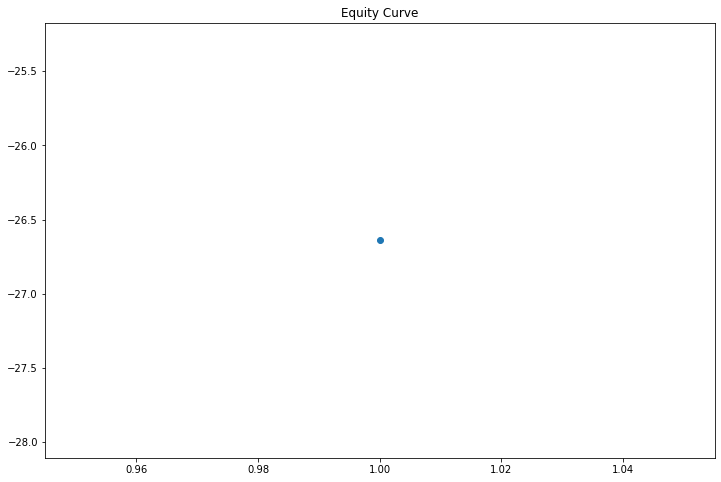

In [104]:
backtesting_base.metrics()

### Advance & to do list

 
 -----
 
 
 

    
 
 genering backtesting - WIP
 
 
    
    
    iterar barra a barra y generar orden si se cumple el patrón (tener una lista con las ordenes o aplicar la función orden de mi backtestig) backtesting solo con el patron
    
    
     
     
 
 solo poc 930 inicialmente, omitir por ahora los distintos escenarios de los pocs

 
 cuando lo anterior funcione, luego ponerle el poc dinamico (cada 15 minutos)
 
 --------
 
 DONE (NOVEMBER 29) iterar la data barra a barra (do_next function) y con la data completa y comparar
 
 DONE (OCTOBER 24 - 30) understand evaluate() function and apply it
 
 DONE (OCTOBER 24 - 30) resample in secs
 
 DONE BEFORE OCTOBER 24 - tener en cuenta el signo en las desviaciones de los pocs potenciales con respecto al poc 
 
 

##### Questions

What brick sizes the function evaluate (why 1.2, 1.3...)